In [1]:
import pandas as pd
import sys
sys.path.append("../Handlers")
from traintest import TransformerClassificationModel

In [2]:
tcm = TransformerClassificationModel("./spam.csv", "distilbert-base-uncased")
tcm.set_model("Category")
tcm.train_test_val_split(0.1, valid_size=0.1)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
tcm.tokenizing("Category")

Map:   0%|          | 0/4457 [00:00<?, ? examples/s]

Map:   0%|          | 0/557 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

{'label': 'spam', 'Message': 'Great News! Call FREEFONE 08006344447 to claim your guaranteed £1000 CASH or £2000 gift. Speak to a live operator NOW!', 'input_ids': [101, 12403, 2213, 102], 'attention_mask': [1, 1, 1, 1]}


In [4]:
tcm.train("./models")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4457 [00:00<?, ? examples/s]

Map:   0%|          | 0/557 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'Message', 'input_ids', 'attention_mask'],
        num_rows: 4457
    })
    validation: Dataset({
        features: ['label', 'Message', 'input_ids', 'attention_mask'],
        num_rows: 557
    })
    test: Dataset({
        features: ['label', 'Message', 'input_ids', 'attention_mask'],
        num_rows: 558
    })
})


e:\Python Tests\AI\.venv\lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/5580 [00:00<?, ?it/s]

{'loss': 0.0248, 'grad_norm': 0.007928324863314629, 'learning_rate': 1.9e-05, 'epoch': 1.0}


  0%|          | 0/35 [00:00<?, ?it/s]

{'eval_loss': 0.00033193003037013113, 'eval_accuracy': 1.0, 'eval_weighted_precision': 1.0, 'eval_wighted_recall': 1.0, 'eval_weighted_f1': 1.0, 'eval_macro_precision': 1.0, 'eval_macro_recall': 1.0, 'eval_macro_f1': 1.0, 'eval_roc_auc': 1.0, 'eval_runtime': 2.1933, 'eval_samples_per_second': 253.961, 'eval_steps_per_second': 15.958, 'epoch': 1.0}
{'loss': 0.0003, 'grad_norm': 0.0038997624069452286, 'learning_rate': 1.8e-05, 'epoch': 2.0}


  0%|          | 0/35 [00:00<?, ?it/s]

{'eval_loss': 7.724706665612757e-05, 'eval_accuracy': 1.0, 'eval_weighted_precision': 1.0, 'eval_wighted_recall': 1.0, 'eval_weighted_f1': 1.0, 'eval_macro_precision': 1.0, 'eval_macro_recall': 1.0, 'eval_macro_f1': 1.0, 'eval_roc_auc': 1.0, 'eval_runtime': 2.2224, 'eval_samples_per_second': 250.632, 'eval_steps_per_second': 15.749, 'epoch': 2.0}
{'loss': 0.0001, 'grad_norm': 0.0010670601623132825, 'learning_rate': 1.7e-05, 'epoch': 3.0}


  0%|          | 0/35 [00:00<?, ?it/s]

{'eval_loss': 3.227987326681614e-05, 'eval_accuracy': 1.0, 'eval_weighted_precision': 1.0, 'eval_wighted_recall': 1.0, 'eval_weighted_f1': 1.0, 'eval_macro_precision': 1.0, 'eval_macro_recall': 1.0, 'eval_macro_f1': 1.0, 'eval_roc_auc': 1.0, 'eval_runtime': 2.2294, 'eval_samples_per_second': 249.838, 'eval_steps_per_second': 15.699, 'epoch': 3.0}
{'loss': 0.0, 'grad_norm': 0.000872042088303715, 'learning_rate': 1.6000000000000003e-05, 'epoch': 4.0}


  0%|          | 0/35 [00:00<?, ?it/s]

{'eval_loss': 1.767669709806796e-05, 'eval_accuracy': 1.0, 'eval_weighted_precision': 1.0, 'eval_wighted_recall': 1.0, 'eval_weighted_f1': 1.0, 'eval_macro_precision': 1.0, 'eval_macro_recall': 1.0, 'eval_macro_f1': 1.0, 'eval_roc_auc': 1.0, 'eval_runtime': 2.225, 'eval_samples_per_second': 250.337, 'eval_steps_per_second': 15.73, 'epoch': 4.0}
{'train_runtime': 724.8146, 'train_samples_per_second': 122.983, 'train_steps_per_second': 7.699, 'train_loss': 0.006290314467890875, 'epoch': 4.0}


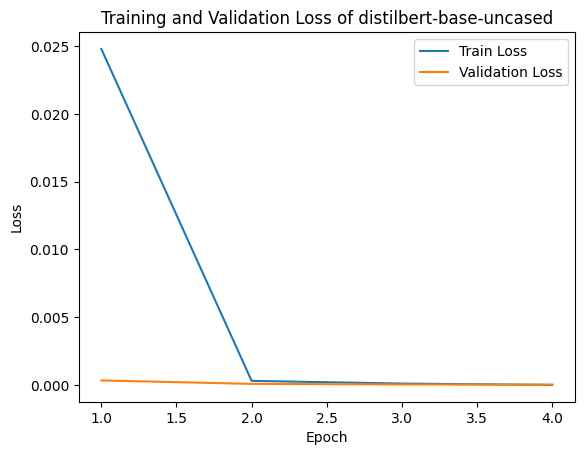

In [5]:
tcm.plot_training_validation_loss()

In [6]:
metrics = tcm.evaluate()
metrics

  0%|          | 0/35 [00:00<?, ?it/s]

{'accuracy': 1.0,
 'weighted_precision': 1.0,
 'wighted_recall': 1.0,
 'weighted_f1': 1.0,
 'macro_precision': 1.0,
 'macro_recall': 1.0,
 'macro_f1': 1.0,
 'roc_auc': 1.0}

In [7]:
del tcm
del metrics